In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import IPython

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import sklearn

from tqdm import tqdm
from PIL import Image
import tensorflow as tf

In [3]:
monet_dir = "../input/gan-getting-started/monet_jpg"
monet_files = [os.path.join(monet_dir, f) for f in os.listdir(monet_dir) if f.endswith(".jpg")]

photo_dir = "../input/gan-getting-started/photo_jpg"
photo_files = [os.path.join(photo_dir, f) for f in os.listdir(photo_dir) if f.endswith(".jpg")]

# Exploratory Data Analysis

In [4]:
widths, heights = zip(*(Image.open(img).size for img in monet_files))
widths = np.array(widths)
heights = np.array(heights)

print(f"Total images: {len(monet_files)}, Shape: {(len(widths), 2)}")

print("Width Stats:")
print(f"  Mean: {widths.mean():.2f}, Min: {widths.min()}, Max: {widths.max()}, Std: {widths.std():.2f}")

print("Height Stats:")
print(f"  Mean: {heights.mean():.2f}, Min: {heights.min()}, Max: {heights.max()}, Std: {heights.std():.2f}")

Total images: 300, Shape: (300, 2)
Width Stats:
  Mean: 256.00, Min: 256, Max: 256, Std: 0.00
Height Stats:
  Mean: 256.00, Min: 256, Max: 256, Std: 0.00


Found 300 Monet images.


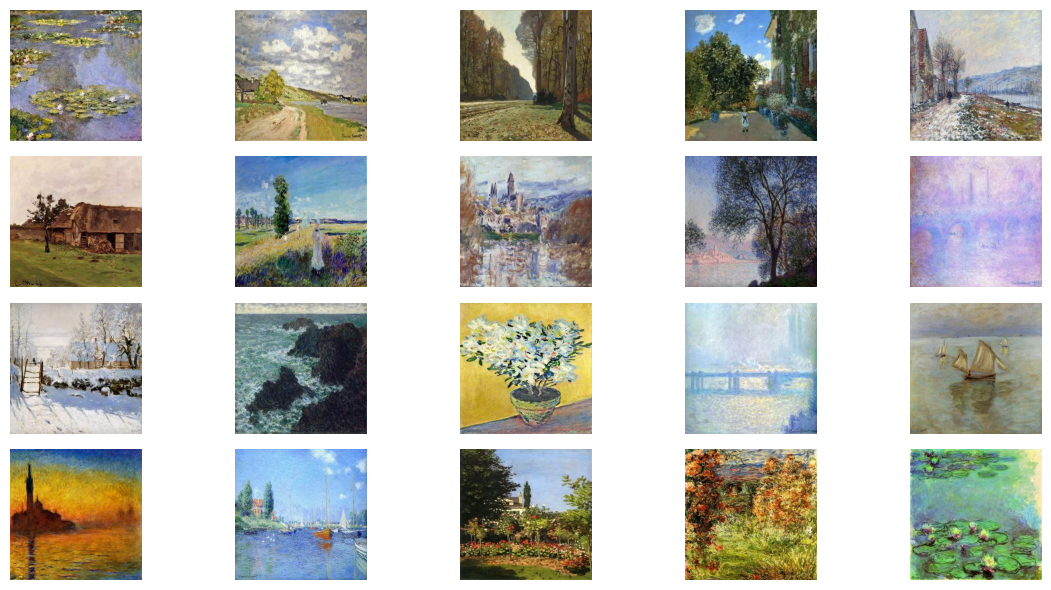

In [5]:
print(f"Found {len(monet_files)} Monet images.")
selected_images = monet_files[:20]

plt.figure(figsize=(12, 6))
for i, img_path in enumerate(selected_images, 1):
    plt.subplot(4, 5, i)
    plt.imshow(Image.open(img_path))
    plt.axis("off")

plt.tight_layout()
plt.show()

Found non- 7038 Monet images.


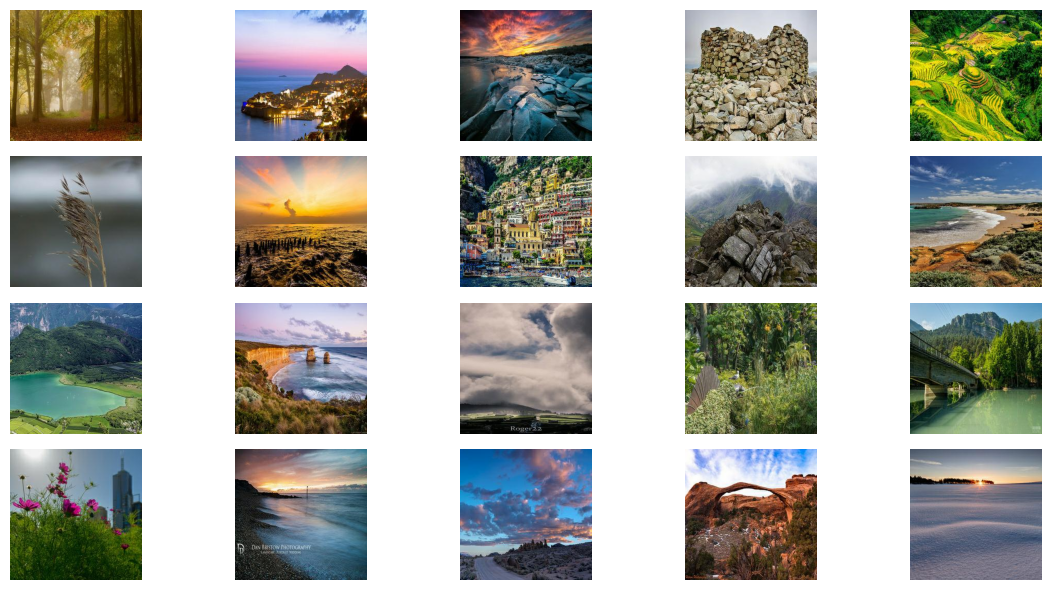

In [6]:
print(f"Found non- {len(photo_files)} Monet images.")
selected_images = photo_files[:20]

plt.figure(figsize=(12, 6))
for i, img_path in enumerate(selected_images, 1):
    plt.subplot(4, 5, i)
    plt.imshow(Image.open(img_path))
    plt.axis("off")

plt.tight_layout()
plt.show()

- **Loading and Processing**: The code loads each image from a list of Monet images, converts them to RGB mode, and extracts pixel values.
- **Extracting RGB Values**: It flattens and stores the red, green, and blue pixel values from each image into separate lists.
- **Calculating Averages**: It calculates the average intensity of red, green, and blue colors across all the images.
- **Visualization**: The averages are plotted in a bar chart to visually represent the distribution of RGB color intensities across the images.


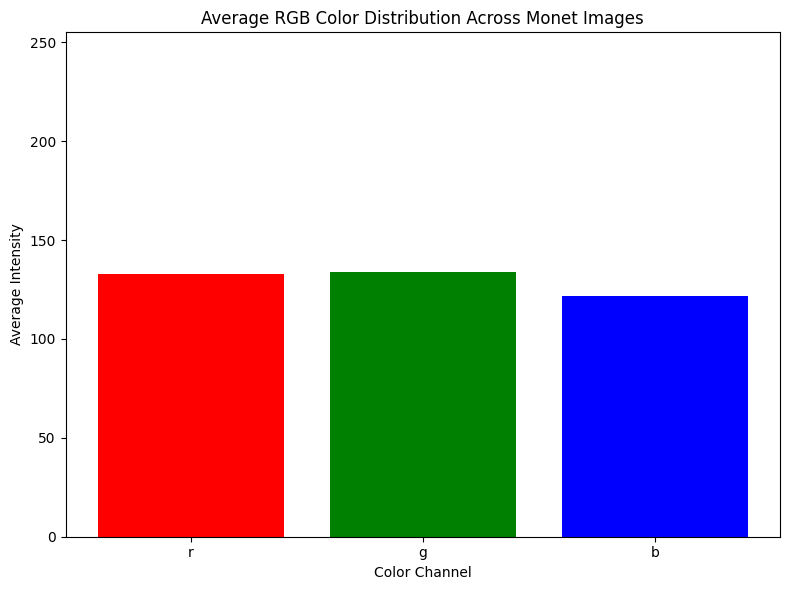

Average Red Intensity: 132.96
Average Green Intensity: 133.73
Average Blue Intensity: 121.57


In [7]:
r_values = []
g_values = []
b_values = []

for img_path in monet_files:
    img = Image.open(img_path)
    img = img.convert("RGB")
    img_np = np.array(img)

    r_values.extend(img_np[:,:,0].flatten())
    g_values.extend(img_np[:,:,1].flatten())
    b_values.extend(img_np[:,:,2].flatten())

r_values = np.array(r_values)
g_values = np.array(g_values)
b_values = np.array(b_values)

avg_r = np.mean(r_values)
avg_g = np.mean(g_values)
avg_b = np.mean(b_values)

plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
avg_values = [avg_r, avg_g, avg_b]
plt.bar(colors, avg_values, color=colors)

plt.title("Average RGB Color Distribution Across Monet Images")
plt.xlabel("Color Channel")
plt.ylabel("Average Intensity")
plt.ylim(0, 255)
plt.tight_layout()

plt.show()

print(f"Average Red Intensity: {avg_r:.2f}")
print(f"Average Green Intensity: {avg_g:.2f}")
print(f"Average Blue Intensity: {avg_b:.2f}")

- **Loading and Processing**: The code loads each image from the list of Monet images, converts them to RGB mode, resizes them to a smaller scale, and extracts pixel values.
- **Extracting RGB Values**: The red, green, and blue pixel values are flattened and stored in separate lists.
- **Calculating Histograms**: It calculates histograms for the red, green, and blue color channels, representing the distribution of pixel intensities within each channel.
- **Visualization**: The histograms of each color channel are plotted on a line chart to show the distribution of RGB color intensities across the images.


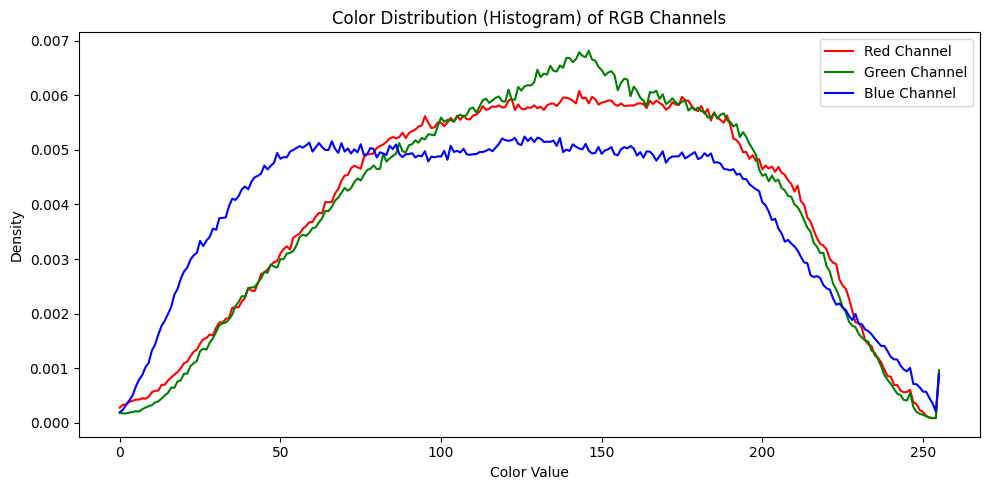

In [8]:
r_values = []
g_values = []
b_values = []

for img_path in monet_files:
    img = Image.open(img_path)
    img = img.convert("RGB")
    img = img.resize((img.width // 4, img.height // 4))
    img_np = np.array(img)
    r_values.extend(img_np[:,:,0].flatten())
    g_values.extend(img_np[:,:,1].flatten())
    b_values.extend(img_np[:,:,2].flatten())

r_values = np.array(r_values)
g_values = np.array(g_values)
b_values = np.array(b_values)

r_hist, r_bins = np.histogram(r_values, bins=256, range=(0, 256), density=True)
g_hist, g_bins = np.histogram(g_values, bins=256, range=(0, 256), density=True)
b_hist, b_bins = np.histogram(b_values, bins=256, range=(0, 256), density=True)

plt.figure(figsize=(10, 5))
plt.plot(r_bins[:-1], r_hist, color='r', label='Red Channel')
plt.plot(g_bins[:-1], g_hist, color='g', label='Green Channel')
plt.plot(b_bins[:-1], b_hist, color='b', label='Blue Channel')

plt.title("Color Distribution (Histogram) of RGB Channels")
plt.xlabel("Color Value")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

- **File Loading**: The code loads Monet and photo image files from specified directories, filtering for `.jpg` files.
- **Sobel Edge Detection**: A function is defined to apply Sobel edge detection on an image, calculating both the horizontal (X) and vertical (Y) gradients.
- **Processing Images**: The code processes the first two images from both the Monet and photo directories, performing Sobel edge detection on each.
- **Visualization**: It creates a 2x2 subplot to display the Sobel X and Y gradients for both Monet and photo images, with titles indicating the image and gradient type. The plots are shown using `matplotlib`.


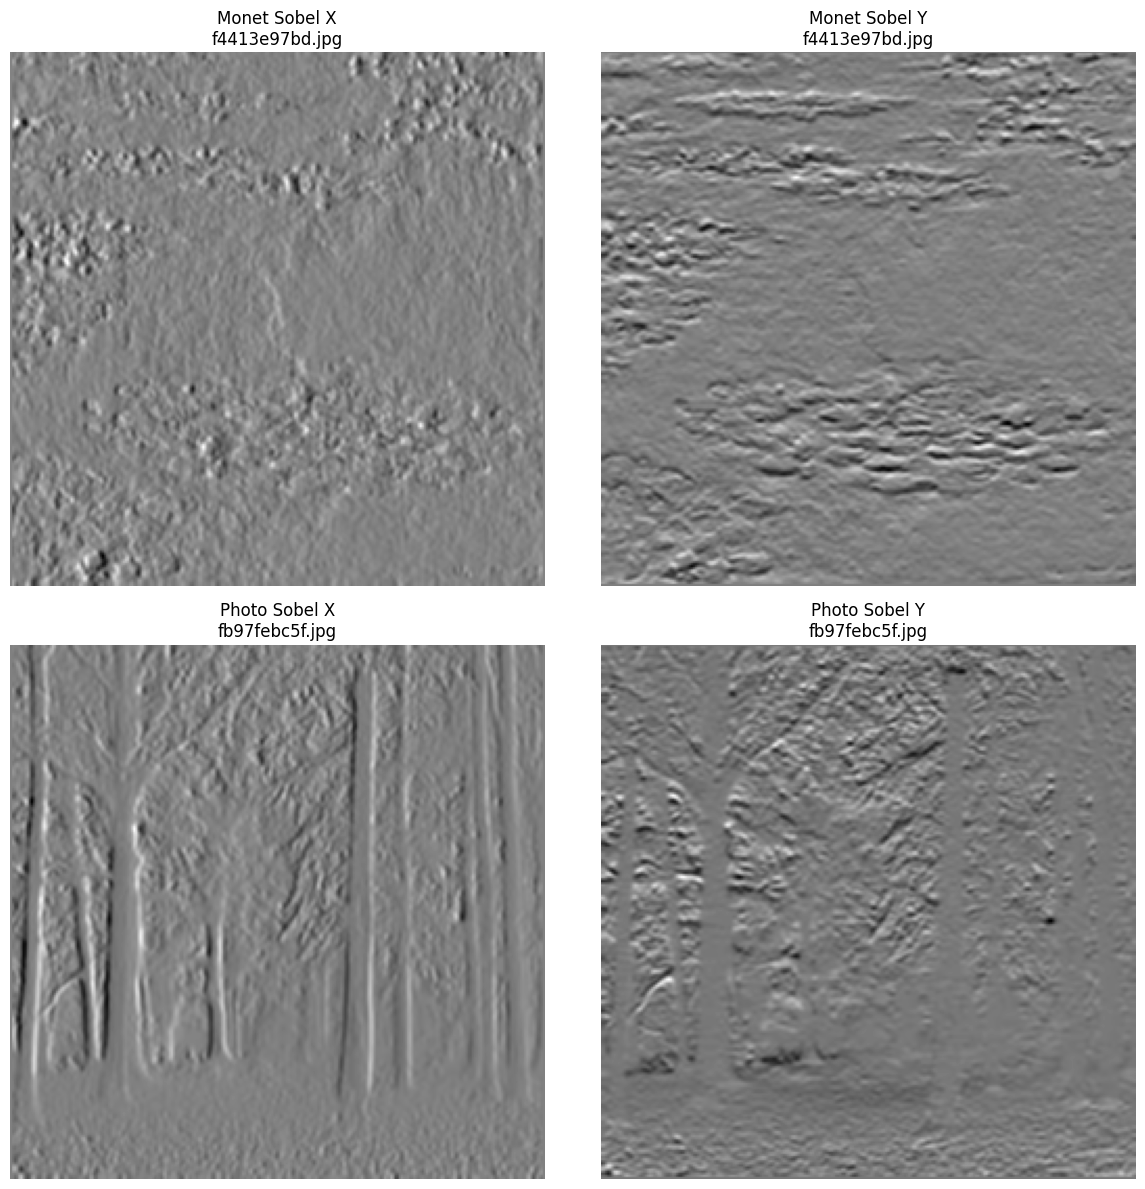

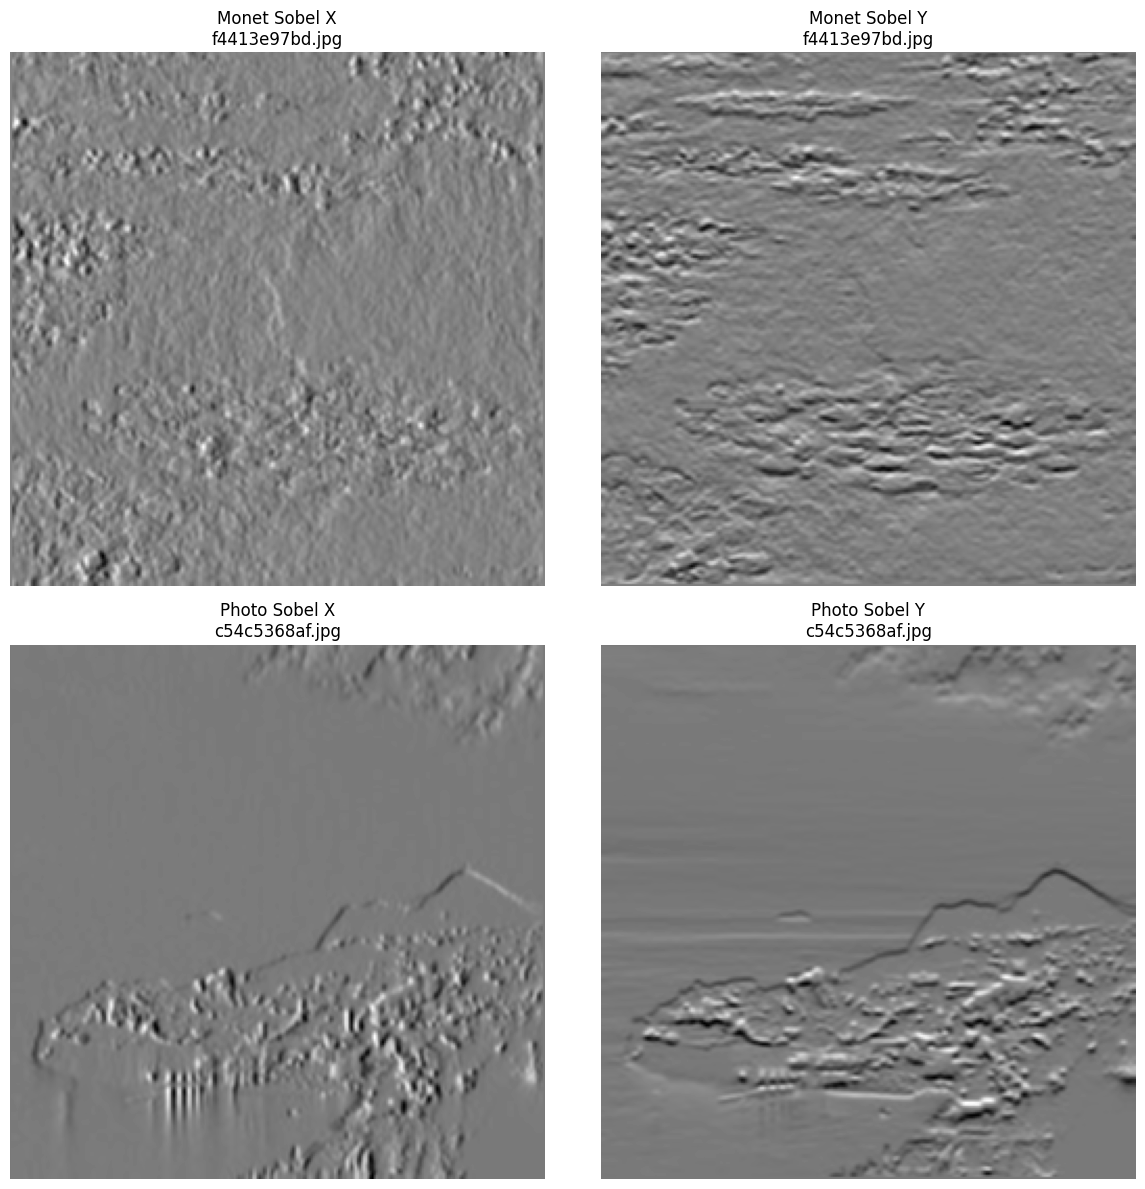

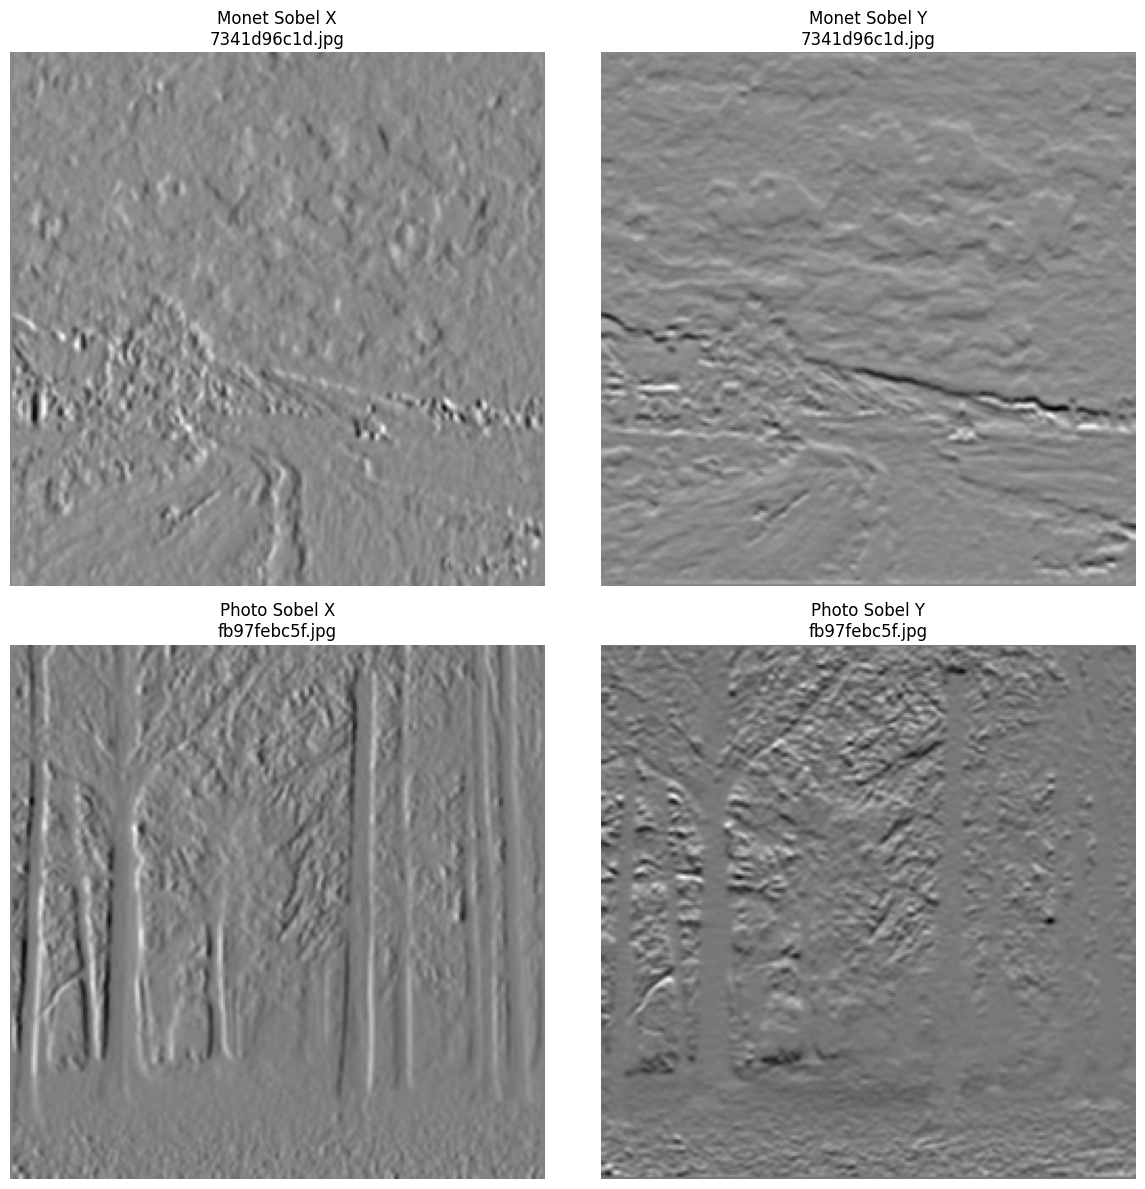

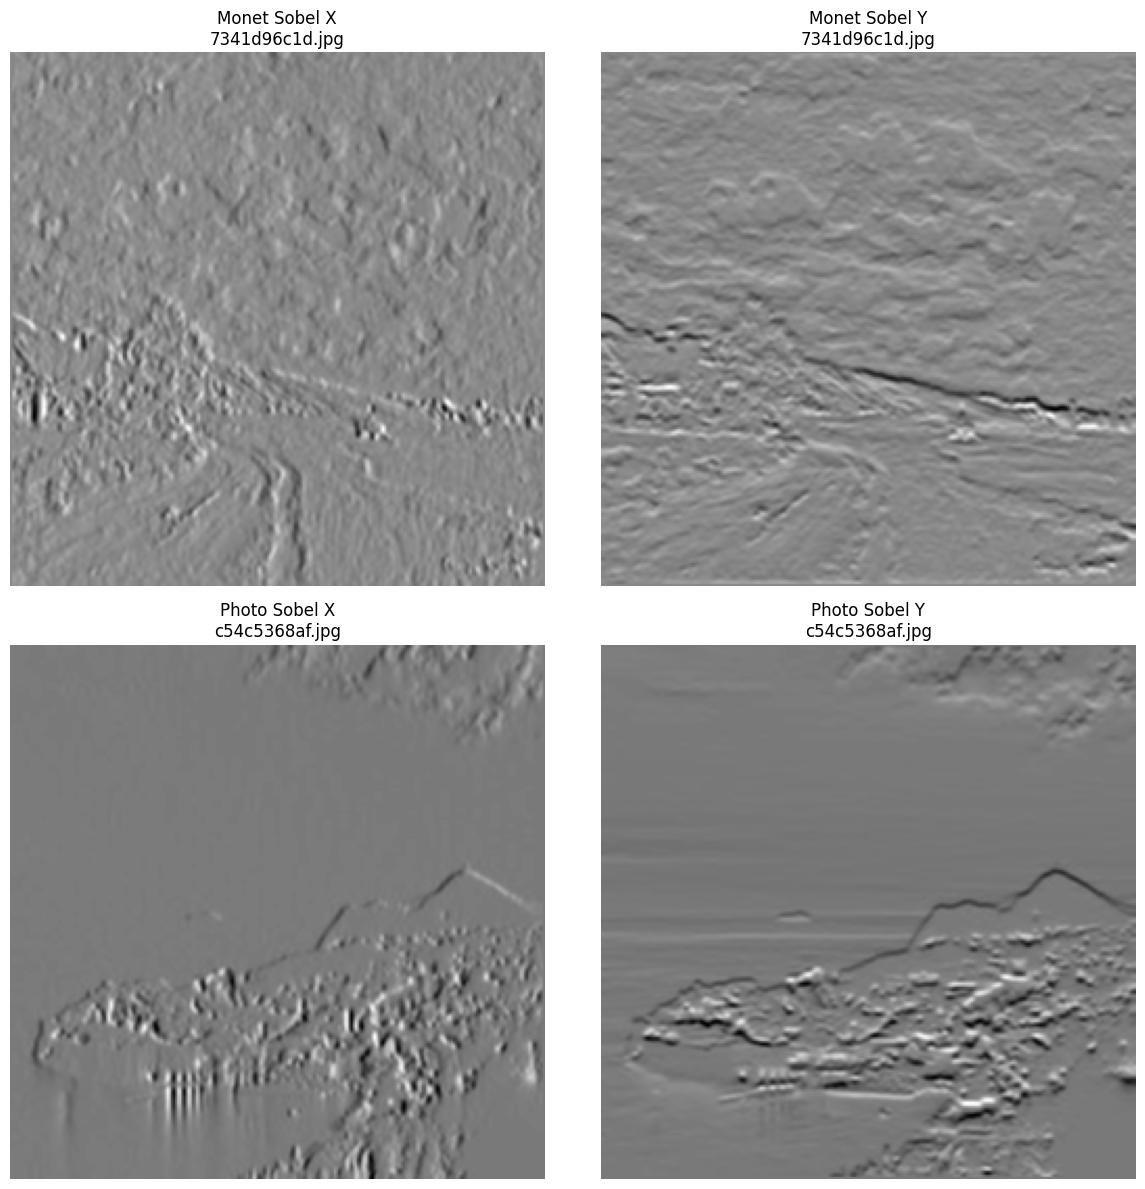

In [9]:
import cv2
import matplotlib.pyplot as plt
import os

monet_dir = "../input/gan-getting-started/monet_jpg"
monet_files = [os.path.join(monet_dir, f) for f in os.listdir(monet_dir) if f.endswith(".jpg")]

photo_dir = "../input/gan-getting-started/photo_jpg"
photo_files = [os.path.join(photo_dir, f) for f in os.listdir(photo_dir) if f.endswith(".jpg")]

def sobel_edge_detection(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
    return sobelx, sobely

for monet_path in monet_files[:2]:
    for photo_path in photo_files[:2]:
        sobelx_monet, sobely_monet = sobel_edge_detection(monet_path)
        sobelx_photo, sobely_photo = sobel_edge_detection(photo_path)
        fig, axes = plt.subplots(2, 2, figsize=(12, 12))

        axes[0, 0].imshow(sobelx_monet, cmap='gray')
        axes[0, 0].set_title(f"Monet Sobel X\n{os.path.basename(monet_path)}")
        axes[0, 0].axis('off')

        axes[0, 1].imshow(sobely_monet, cmap='gray')
        axes[0, 1].set_title(f"Monet Sobel Y\n{os.path.basename(monet_path)}")
        axes[0, 1].axis('off')

        axes[1, 0].imshow(sobelx_photo, cmap='gray')
        axes[1, 0].set_title(f"Photo Sobel X\n{os.path.basename(photo_path)}")
        axes[1, 0].axis('off')

        axes[1, 1].imshow(sobely_photo, cmap='gray')
        axes[1, 1].set_title(f"Photo Sobel Y\n{os.path.basename(photo_path)}")
        axes[1, 1].axis('off')

        plt.tight_layout()
        plt.show()

- **File Loading**: The code loads Monet and photo images from specified directories, filtering for `.jpg` files.
- **Image Difference Calculation**: A function is defined to calculate the pixel-wise absolute difference between two images, resizing them to 256x256 before comparison.
- **Image Comparison and Plotting**: The code randomly selects two images from the same category (Monet or photo), calculates the pixel-wise difference, and generates a histogram of these differences.
- **Statistical Analysis**: It calculates and prints the mean, standard deviation, maximum, and minimum of the pixel differences between the selected images.
- **Visualization**: A histogram is displayed to show the distribution of pixel-wise differences between the two images.


Monet vs Monet Comparison


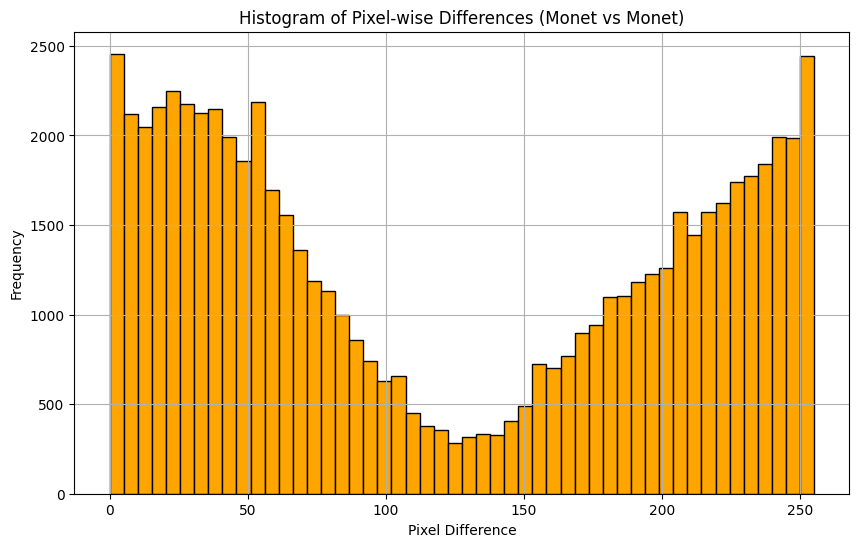

Comparison: Monet vs Monet
Mean Difference: 120.07
Standard Deviation of Differences: 87.15
Max Difference: 255.00
Min Difference: 0.00

Photo vs Photo Comparison


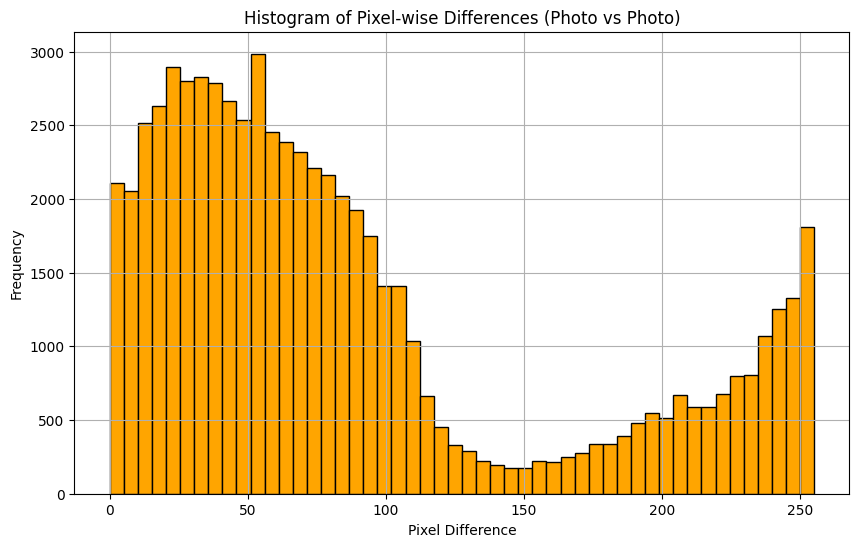

Comparison: Photo vs Photo
Mean Difference: 87.89
Standard Deviation of Differences: 73.93
Max Difference: 255.00
Min Difference: 0.00



In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random

monet_dir = "../input/gan-getting-started/monet_jpg"
monet_files = [os.path.join(monet_dir, f) for f in os.listdir(monet_dir) if f.endswith(".jpg")]

photo_dir = "../input/gan-getting-started/photo_jpg"
photo_files = [os.path.join(photo_dir, f) for f in os.listdir(photo_dir) if f.endswith(".jpg")]

def image_difference(img1_path, img2_path):
    img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)
    
    img1 = cv2.resize(img1, (256, 256))
    img2 = cv2.resize(img2, (256, 256))
    diff = np.abs(img1 - img2)
    
    return diff

def plot_image_comparison(image_paths_1, image_paths_2, label1, label2):
    img_path_1 = random.choice(image_paths_1)
    img_path_2 = random.choice(image_paths_2)
    
    diff = image_difference(img_path_1, img_path_2)
    
    mean_diff = np.mean(diff)
    std_diff = np.std(diff)
    max_diff = np.max(diff)
    min_diff = np.min(diff)
    
    plt.figure(figsize=(10, 6))
    plt.hist(diff.flatten(), bins=50, color='orange', edgecolor='black')
    plt.title(f"Histogram of Pixel-wise Differences ({label1} vs {label2})")
    plt.xlabel("Pixel Difference")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

    print(f"Comparison: {label1} vs {label2}")
    print(f"Mean Difference: {mean_diff:.2f}")
    print(f"Standard Deviation of Differences: {std_diff:.2f}")
    print(f"Max Difference: {max_diff:.2f}")
    print(f"Min Difference: {min_diff:.2f}\n")

print("Monet vs Monet Comparison")
plot_image_comparison(monet_files, monet_files, "Monet", "Monet")

print("Photo vs Photo Comparison")
plot_image_comparison(photo_files, photo_files, "Photo", "Photo")

# Analysis

The CycleGAN model is used for **image-to-image translation** where we don't have paired images for training. It works by learning two mappings: from domain X to Y (e.g., from photos to paintings) and from domain Y to X (e.g., from paintings to photos). This type of model is used in unsupervised learning settings where paired data isn't available.

## **Components**
1. **Generator (G)**
   - The generator network (G) learns to generate fake images that resemble the target domain (Y) given images from domain X. It translates images from domain X to domain Y.
   - There is another generator (F) that does the reverse, translating images from domain Y to domain X.

2. **Discriminator (D)**
   - The discriminator (D) is a classifier that differentiates between real and fake images in both domains.
   - The **discriminator for X** tries to distinguish between real and generated images from domain X, and the **discriminator for Y** does the same for images in domain Y.

3. **Loss Functions**
   - **Generator Loss**: Measures how well the generator produces realistic images that fool the discriminator.
   - **Discriminator Loss**: Measures how well the discriminator can distinguish real images from fake ones.
   - **Cycle Consistency Loss**: Ensures that an image translated to the other domain can be translated back to the original domain. This encourages the generator to preserve the content.
   - **Identity Loss**: Ensures that when an image from the target domain is fed to the generator, it should not undergo a transformation (used for preserving color and other characteristics).

---

## **Workflow**

1. **Initial Setup**:
   - The model is set up with two generators (G and F) and two discriminators (D_X and D_Y).
   - The optimizers are created for each of the four models (G, F, D_X, D_Y).

2. **Training Step**:
   - **Generator G** is tasked with generating fake images from real images in domain X (fake Y).
   - **Generator F** is tasked with generating fake images from real images in domain Y (fake X).
   - Both generators use each other’s outputs to form **cycle consistency**. For example, G generates fake Y from X, and F generates fake X from the fake Y.
   - Both **Discriminators** (D_X, D_Y) are used to evaluate the quality of the fake images generated by G and F. They output a real/fake score that helps guide the training process.

3. **Loss Calculations**:
   - **Generator Loss**: The generators are trained to minimize how easily their outputs are detected as fake by the discriminators. This loss is calculated using Mean Squared Error (MSE) between the output of the discriminator and the target value (real or fake).
   - **Discriminator Loss**: The discriminators are trained to correctly classify images as real or fake. The loss is also calculated using MSE between the discriminator’s predictions and the real/fake labels.
   - **Cycle Consistency Loss**: This ensures that the transformation between domains is reversible, meaning if an image is transformed and then transformed back, it should resemble the original. The cycle loss is the mean absolute error between the real and cycled images.
   - **Identity Loss**: When a real image from domain X or Y is passed through the generator (e.g., real X to G or real Y to F), it should remain unchanged. This helps maintain important properties like color.

4. **Optimization**:
   - After computing the gradients of the loss functions using `tf.GradientTape`, the optimizers update the weights of each model.
   - Each generator and discriminator has its own optimizer that minimizes its respective loss.

---

## **Detailed Explanation of Functions in the Code**

1. **`train_step(real_x, real_y)`**:
   - This function defines a single step of training.
   - **Forward Pass**:
     - `fake_y` is generated by passing `real_x` through `generator_g`.
     - `cycled_x` is generated by passing `fake_y` through `generator_f` to reconstruct the original image.
     - `fake_x` is generated by passing `real_y` through `generator_f`.
     - `cycled_y` is generated by passing `fake_x` through `generator_g` to reconstruct the original image.
     - The discriminators (D_X and D_Y) evaluate the real and fake images from both domains.
   - **Loss Calculation**:
     - Generator losses are computed for both generators.
     - Cycle consistency loss and identity loss are added to the total generator losses.
     - Discriminator losses are computed by comparing the real and fake image outputs.
   - **Backpropagation**:
     - The gradients are computed for each model, and the optimizer updates the model weights.

2. **`generator_loss()`**:
   - This calculates the loss for the generator by measuring how well the fake images generated by the generator can fool the discriminator.

3. **`discriminator_loss()`**:
   - This calculates the loss for the discriminator by measuring how well it can distinguish between real and fake images.

4. **`calc_cycle_loss()`**:
   - This calculates the cycle consistency loss to ensure the model can map an image from one domain to another and back without losing its key content features.

5. **`identity_loss()`**:
   - This calculates the identity loss to make sure an image from domain X or Y remains unchanged after being passed through the respective generator.

---

## **Summary of the Workflow**:

1. Each **epoch** starts by selecting a batch of real images from both domains X and Y.
2. The **generators** produce fake images from the real images, and the **discriminators** try to classify the images as real or fake.
3. The loss functions for both the **generators** and **discriminators** are computed.
4. Gradients are calculated using `tf.GradientTape` and applied to update the models.
5. After a number of epochs, the model learns to generate realistic images by minimizing the generator losses and maximizing the discriminator losses.

---

### **Final Notes**:
- This architecture is based on the **CycleGAN** concept, which enables unpaired image-to-image translation.
- The model uses **mixed precision** to speed up training by using 16-bit floats for most operations, which is especially helpful when working with large datasets or on GPUs.


In [11]:
import tensorflow as tf
import glob
import time
from tqdm import tqdm
import tensorflow.keras.backend as K
import logging
import matplotlib.pyplot as plt
from tensorflow.keras import mixed_precision
logging.basicConfig(level=logging.INFO)

IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 4
BUFFER_SIZE = 1000
EPOCHS = 25
LAMBDA = 10

policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

def instance_norm(x, epsilon=1e-5):
    return tf.keras.layers.LayerNormalization(axis=[1, 2], epsilon=epsilon)(x)

def load_image(image_file):
    image = tf.io.read_file(image_file)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH])
    return (image / 127.5) - 1

def create_dataset(paths):
    dataset = tf.data.Dataset.from_tensor_slices(paths)
    dataset = dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)  # Parallel image loading
    dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).cache().prefetch(tf.data.AUTOTUNE)  # Caching and prefetching
    return dataset

def resnet_block(x, filters, size=3):
    initializer = tf.random_normal_initializer(0., 0.02)
    y = tf.keras.layers.Conv2D(filters, size, padding='same', kernel_initializer=initializer, use_bias=False)(x)
    y = instance_norm(y)
    y = tf.keras.layers.ReLU()(y)
    y = tf.keras.layers.Conv2D(filters, size, padding='same', kernel_initializer=initializer, use_bias=False)(y)
    y = instance_norm(y)
    if x.shape[-1] != filters:
        x = tf.keras.layers.Conv2D(filters, 1, padding='same', kernel_initializer=initializer, use_bias=False)(x)
    return tf.keras.layers.Add()([x, y])

def build_generator():
    inputs = tf.keras.Input(shape=[IMG_HEIGHT, IMG_WIDTH, 3])
    initializer = tf.random_normal_initializer(0., 0.02)
    x = tf.keras.layers.Conv2D(64, 7, padding='same', kernel_initializer=initializer, use_bias=False)(inputs)
    x = instance_norm(x)
    x = tf.keras.layers.ReLU()(x)
    for _ in range(9):
        x = resnet_block(x, 256)
    x = tf.keras.layers.Conv2D(3, 7, padding='same', kernel_initializer=initializer)(x)
    outputs = tf.keras.layers.Activation('tanh')(x)
    return tf.keras.Model(inputs, outputs)

def build_discriminator():
    inputs = tf.keras.Input(shape=[IMG_HEIGHT, IMG_WIDTH, 3])
    initializer = tf.random_normal_initializer(0., 0.02)
    x = tf.keras.layers.Conv2D(64, 4, strides=2, padding='same', kernel_initializer=initializer)(inputs)
    x = tf.keras.layers.LeakyReLU(0.2)(x)
    x = tf.keras.layers.Conv2D(128, 4, strides=2, padding='same', kernel_initializer=initializer, use_bias=False)(x)
    x = instance_norm(x)
    x = tf.keras.layers.LeakyReLU(0.2)(x)
    x = tf.keras.layers.Conv2D(512, 4, padding='same', kernel_initializer=initializer, use_bias=False)(x)
    x = instance_norm(x)
    x = tf.keras.layers.LeakyReLU(0.2)(x)
    outputs = tf.keras.layers.Conv2D(1, 4, padding='same', kernel_initializer=initializer)(x)
    return tf.keras.Model(inputs, outputs)

def generator_loss(fake):
    return tf.keras.losses.MeanSquaredError()(tf.ones_like(fake), fake)

def discriminator_loss(real, fake):
    loss_obj = tf.keras.losses.MeanSquaredError()
    return 0.5 * (loss_obj(tf.ones_like(real), real) + loss_obj(tf.zeros_like(fake), fake))

def calc_cycle_loss(real, cycled):
    real = tf.cast(real, tf.float32)
    cycled = tf.cast(cycled, tf.float32)
    return LAMBDA * tf.reduce_mean(tf.abs(real - cycled))


def identity_loss(real, same):
    real = tf.cast(real, tf.float32)
    same = tf.cast(same, tf.float32)
    return 0.5 * LAMBDA * tf.reduce_mean(tf.abs(real - same))


generator_g = build_generator()
generator_f = build_generator()
discriminator_x = build_discriminator()
discriminator_y = build_discriminator()

generator_g_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
generator_f_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_x_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_y_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

@tf.function
def train_step(real_x, real_y):
    with tf.GradientTape(persistent=True) as tape:
        fake_y = generator_g(real_x, training=True)
        cycled_x = generator_f(fake_y, training=True)
        fake_x = generator_f(real_y, training=True)
        cycled_y = generator_g(fake_x, training=True)
        disc_real_x = discriminator_x(real_x, training=True)
        disc_real_y = discriminator_y(real_y, training=True)
        disc_fake_x = discriminator_x(fake_x, training=True)
        disc_fake_y = discriminator_y(fake_y, training=True)

        gen_g_loss = generator_loss(disc_fake_y)
        gen_f_loss = generator_loss(disc_fake_x)

        cycle_loss = calc_cycle_loss(real_x, cycled_x) + calc_cycle_loss(real_y, cycled_y)
        id_loss = identity_loss(real_x, generator_f(real_x, training=True)) + identity_loss(real_y, generator_g(real_y, training=True))

        total_gen_g_loss = gen_g_loss + cycle_loss + id_loss
        total_gen_f_loss = gen_f_loss + cycle_loss + id_loss

        disc_x_loss = discriminator_loss(disc_real_x, disc_fake_x)
        disc_y_loss = discriminator_loss(disc_real_y, disc_fake_y)
    
    gen_g_grads = tape.gradient(total_gen_g_loss, generator_g.trainable_variables)
    gen_f_grads = tape.gradient(total_gen_f_loss, generator_f.trainable_variables)
    disc_x_grads = tape.gradient(disc_x_loss, discriminator_x.trainable_variables)
    disc_y_grads = tape.gradient(disc_y_loss, discriminator_y.trainable_variables)
    generator_g_optimizer.apply_gradients(zip(gen_g_grads, generator_g.trainable_variables))
    generator_f_optimizer.apply_gradients(zip(gen_f_grads, generator_f.trainable_variables))
    discriminator_x_optimizer.apply_gradients(zip(disc_x_grads, discriminator_x.trainable_variables))
    discriminator_y_optimizer.apply_gradients(zip(disc_y_grads, discriminator_y.trainable_variables))
    return total_gen_g_loss, total_gen_f_loss, disc_x_loss, disc_y_loss

# Results and Summary

In [12]:
sample_x_list = []
sample_y_list = []
dataset_x = create_dataset(photo_files)
dataset_y = create_dataset(monet_files)

for epoch in range(1, EPOCHS + 1):
    start = time.time()
    n = 0
    total_gen_g_loss_epoch = 0
    total_gen_f_loss_epoch = 0
    disc_x_loss_epoch = 0
    disc_y_loss_epoch = 0
    
    for real_x, real_y in tqdm(tf.data.Dataset.zip((dataset_x, dataset_y)), desc=f"Epoch {epoch}", total=len(dataset_x)):
        total_gen_g_loss, total_gen_f_loss, disc_x_loss, disc_y_loss = train_step(real_x, real_y)
        
        total_gen_g_loss_epoch += total_gen_g_loss
        total_gen_f_loss_epoch += total_gen_f_loss
        disc_x_loss_epoch += disc_x_loss
        disc_y_loss_epoch += disc_y_loss
        n += 1
        
    if epoch % 2 == 0:
        sample_x = next(iter(dataset_x))
        sample_y = next(iter(dataset_y))
        sample_x_list.append(sample_x)
        sample_y_list.append(sample_y)
        
    logging.info(f"Epoch {epoch} - Gen G Loss: {total_gen_g_loss_epoch/n:.4f}, Gen F Loss: {total_gen_f_loss_epoch/n:.4f}")
    logging.info(f"Epoch {epoch} - Disc X Loss: {disc_x_loss_epoch/n:.4f}, Disc Y Loss: {disc_y_loss_epoch/n:.4f}")
    logging.info(f"Epoch {epoch} duration: {time.time() - start:.2f} sec")

Epoch 25:   4%|▍         | 75/1760 [03:13<1:12:30,  2.58s/it]


In [13]:
for i, (x, y) in enumerate(zip(sample_x_list, sample_y_list)):
    print(f"Sample {i+1}:")
    print(f"  x shape: {x.shape}")
    print(f"  y shape: {y.shape}")

Sample 1:
  x shape: (4, 128, 128, 3)
  y shape: (4, 128, 128, 3)
Sample 2:
  x shape: (4, 128, 128, 3)
  y shape: (4, 128, 128, 3)
Sample 3:
  x shape: (4, 128, 128, 3)
  y shape: (4, 128, 128, 3)
Sample 4:
  x shape: (4, 128, 128, 3)
  y shape: (4, 128, 128, 3)
Sample 5:
  x shape: (4, 128, 128, 3)
  y shape: (4, 128, 128, 3)
Sample 6:
  x shape: (4, 128, 128, 3)
  y shape: (4, 128, 128, 3)
Sample 7:
  x shape: (4, 128, 128, 3)
  y shape: (4, 128, 128, 3)
Sample 8:
  x shape: (4, 128, 128, 3)
  y shape: (4, 128, 128, 3)
Sample 9:
  x shape: (4, 128, 128, 3)
  y shape: (4, 128, 128, 3)
Sample 10:
  x shape: (4, 128, 128, 3)
  y shape: (4, 128, 128, 3)
Sample 11:
  x shape: (4, 128, 128, 3)
  y shape: (4, 128, 128, 3)
Sample 12:
  x shape: (4, 128, 128, 3)
  y shape: (4, 128, 128, 3)


In [14]:
print(sample_x_list[i].dtype)
print(sample_y_list[i].dtype)

<dtype: 'float32'>
<dtype: 'float32'>


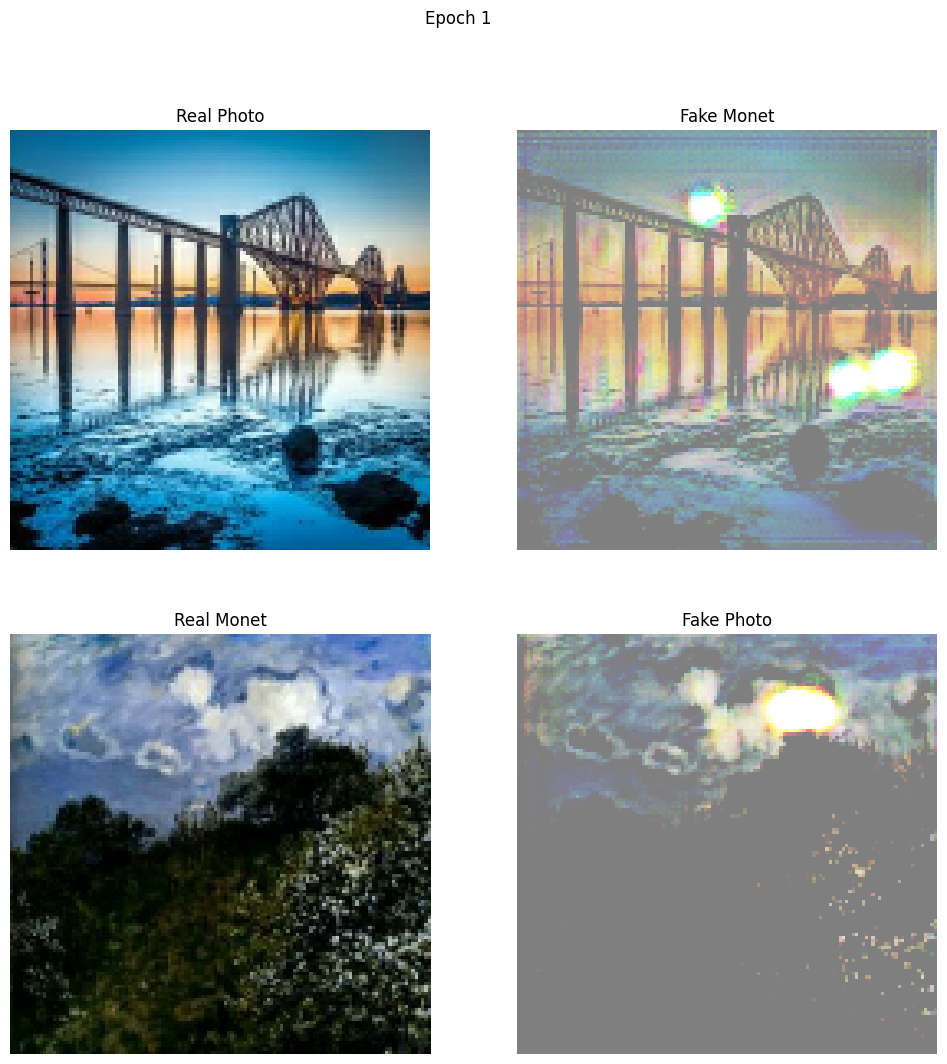

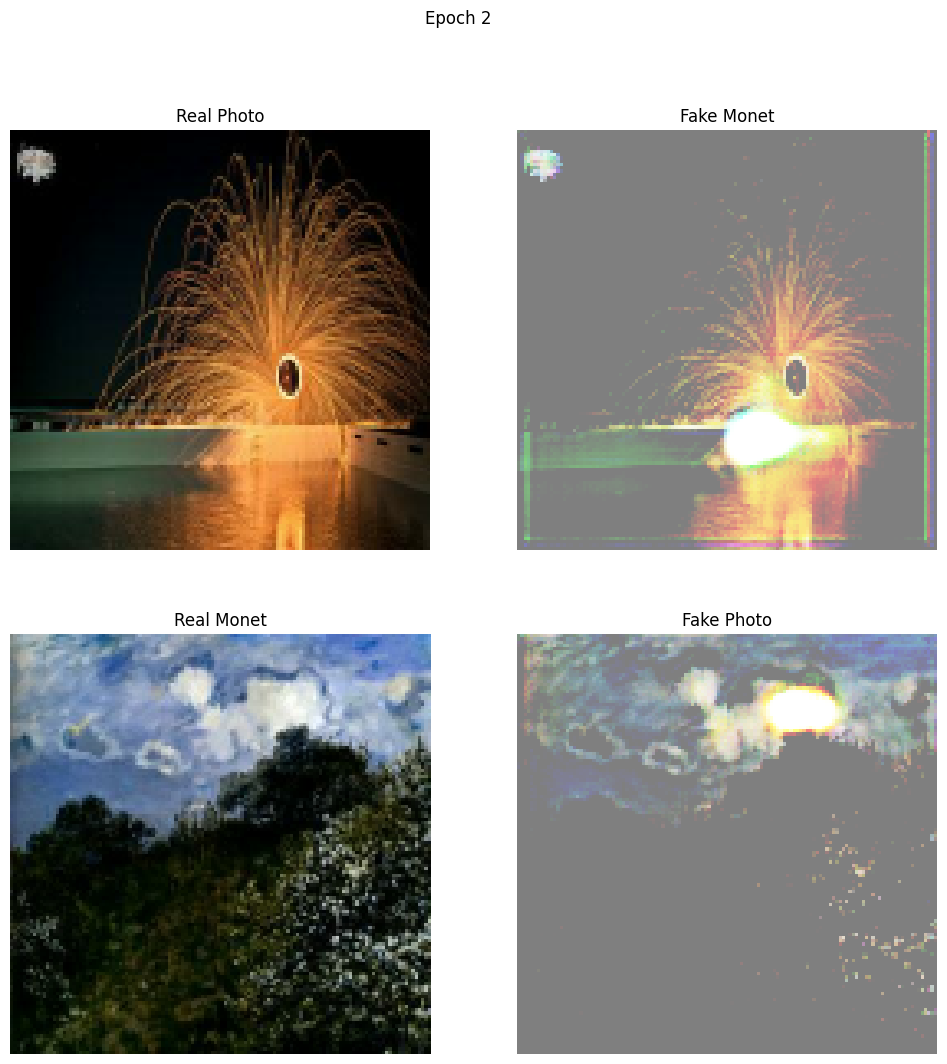

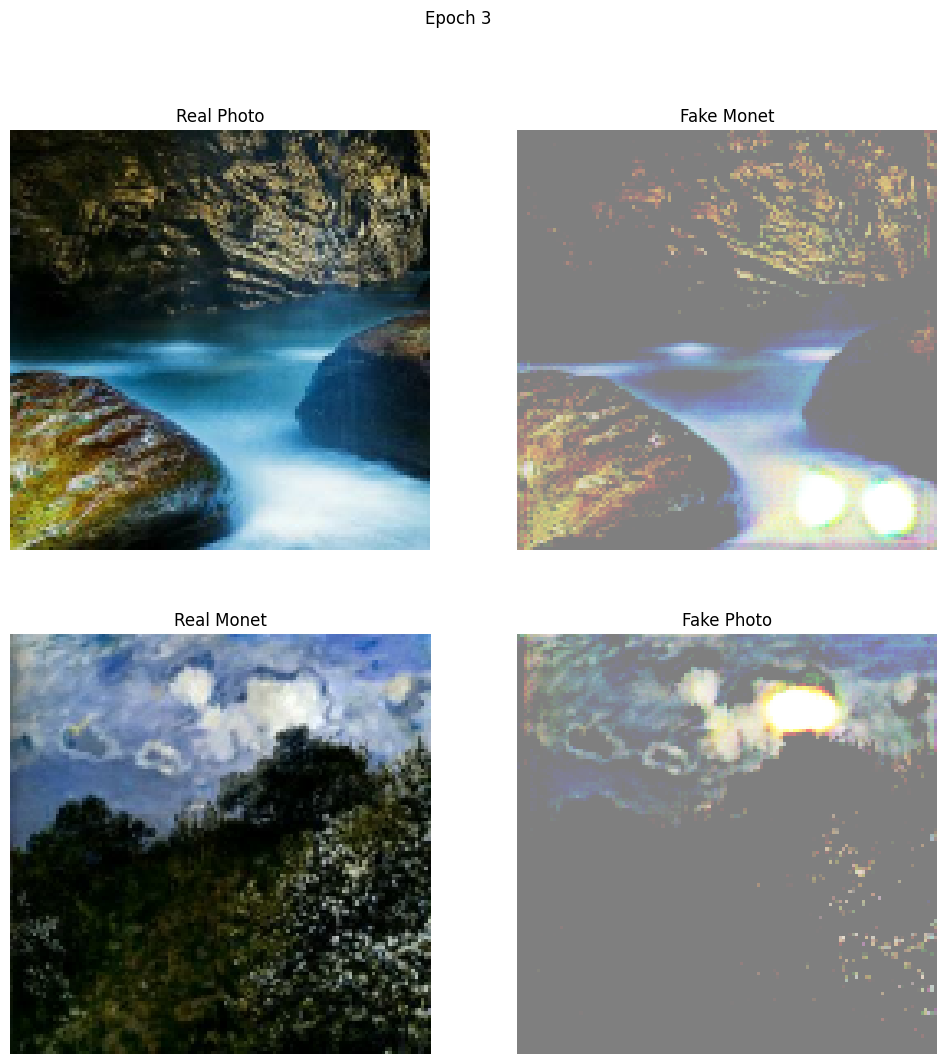

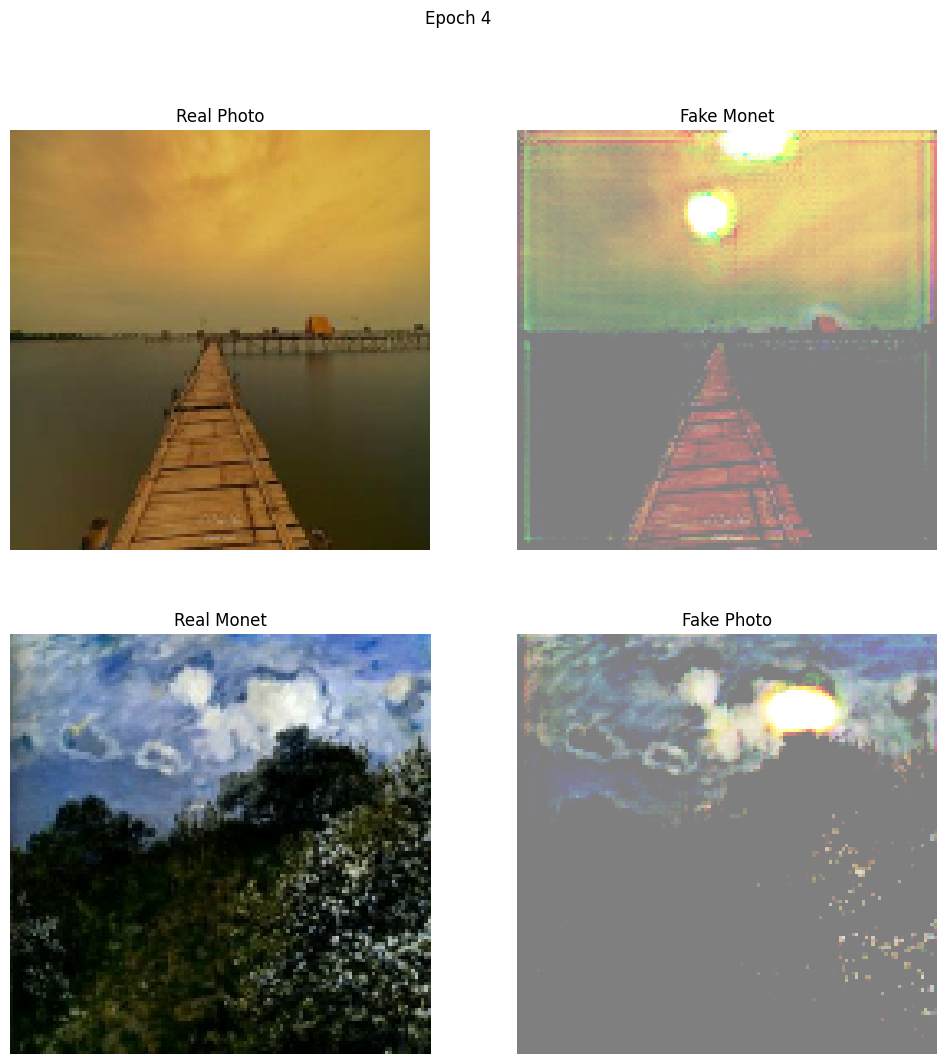

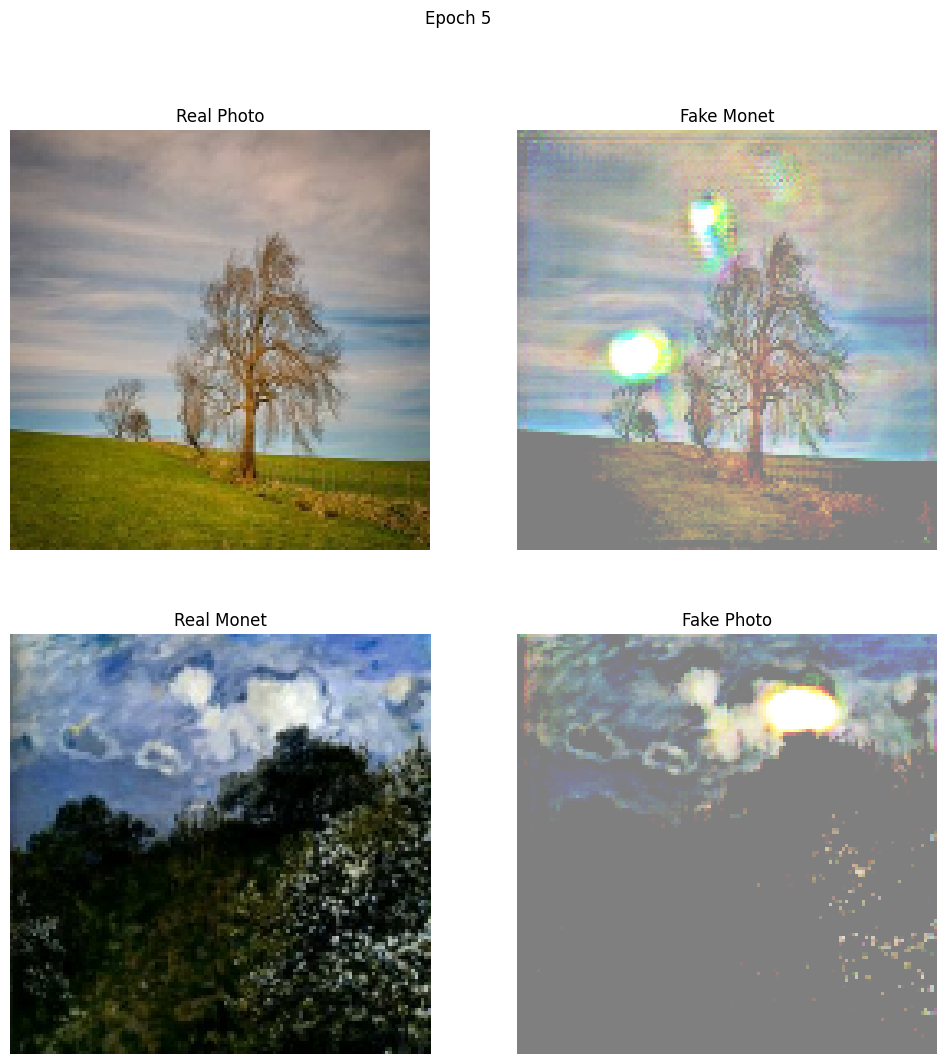

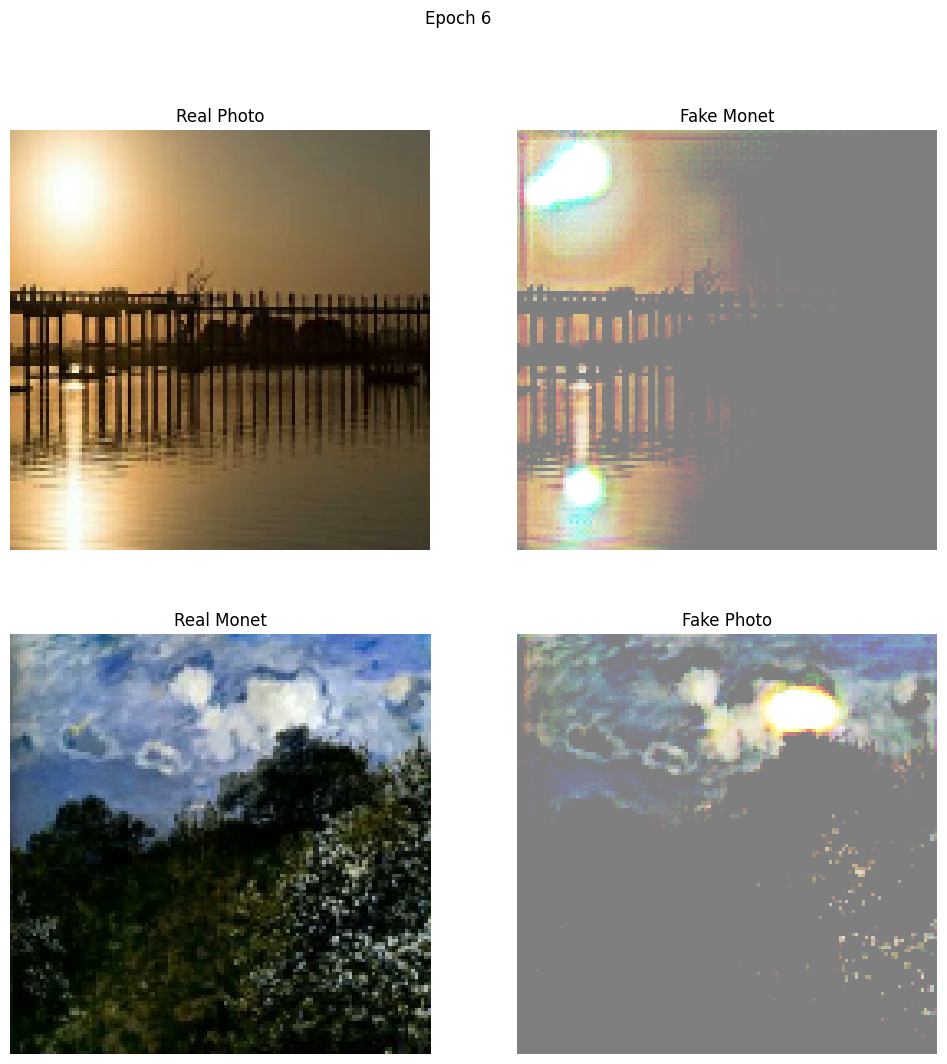

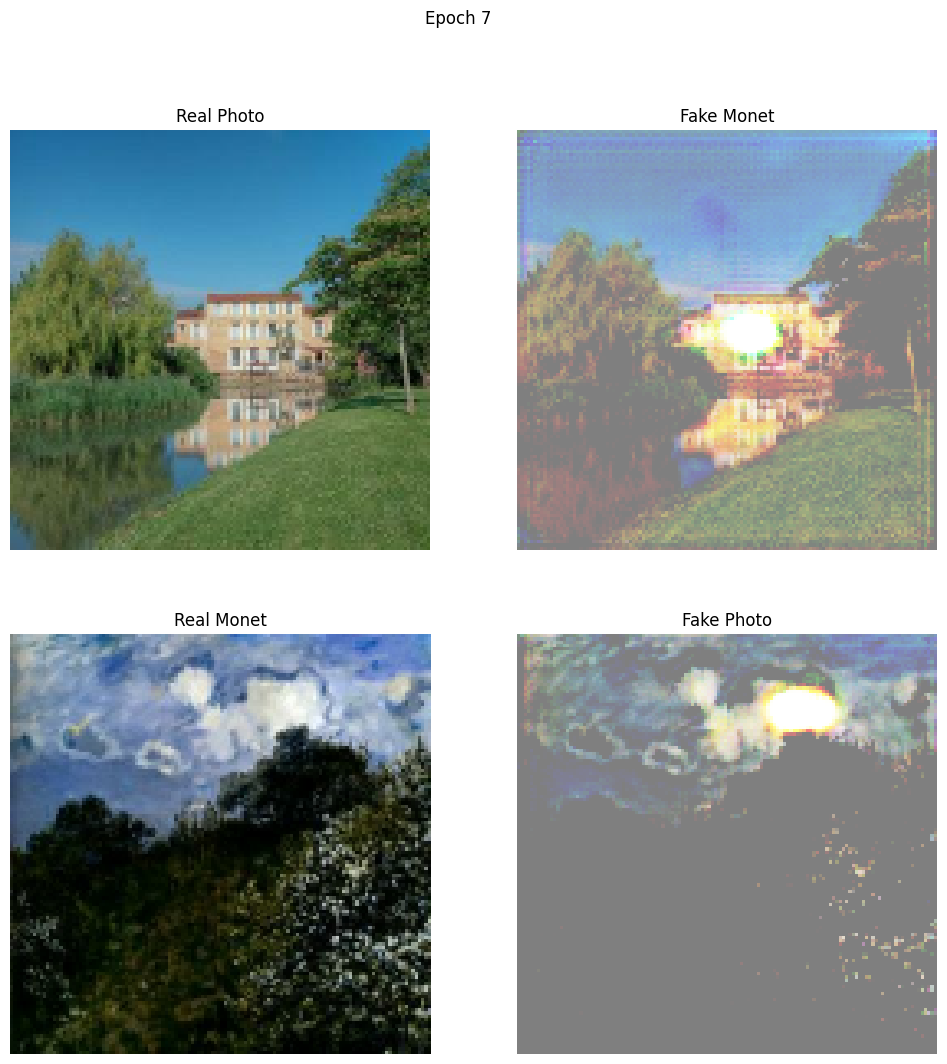

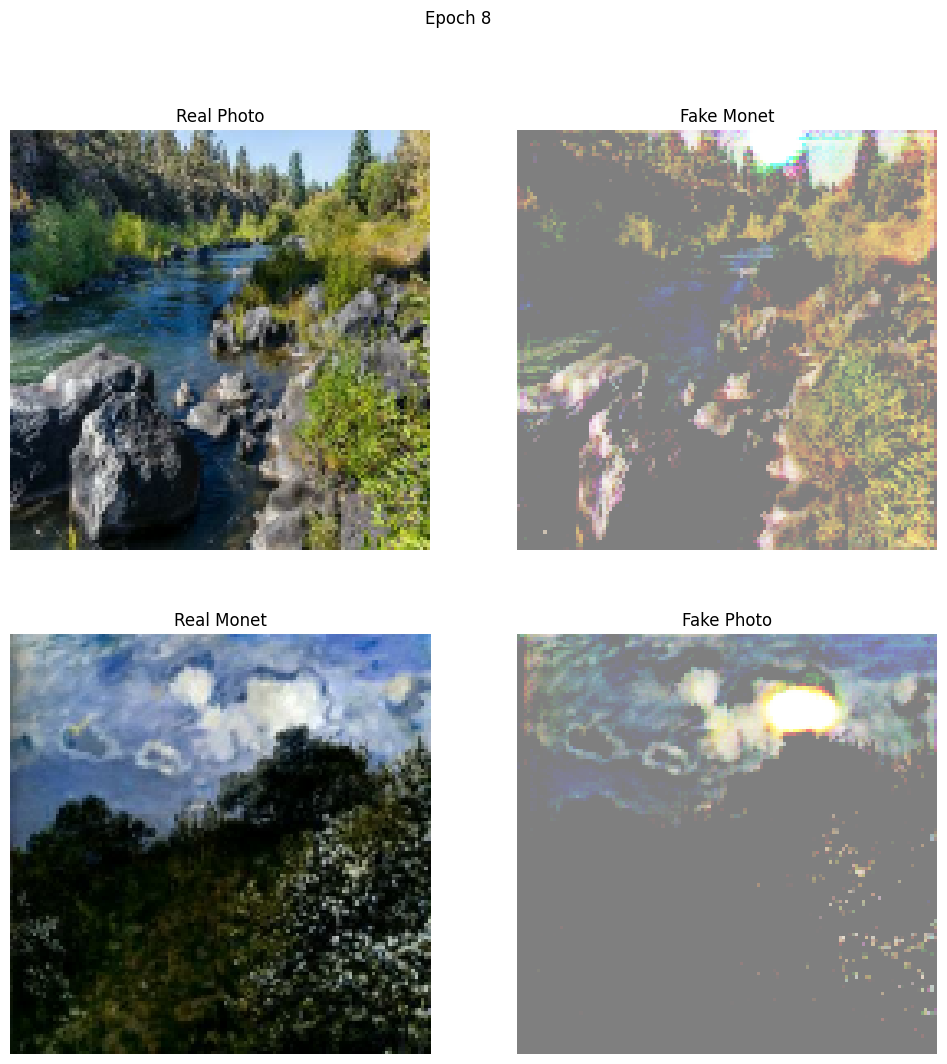

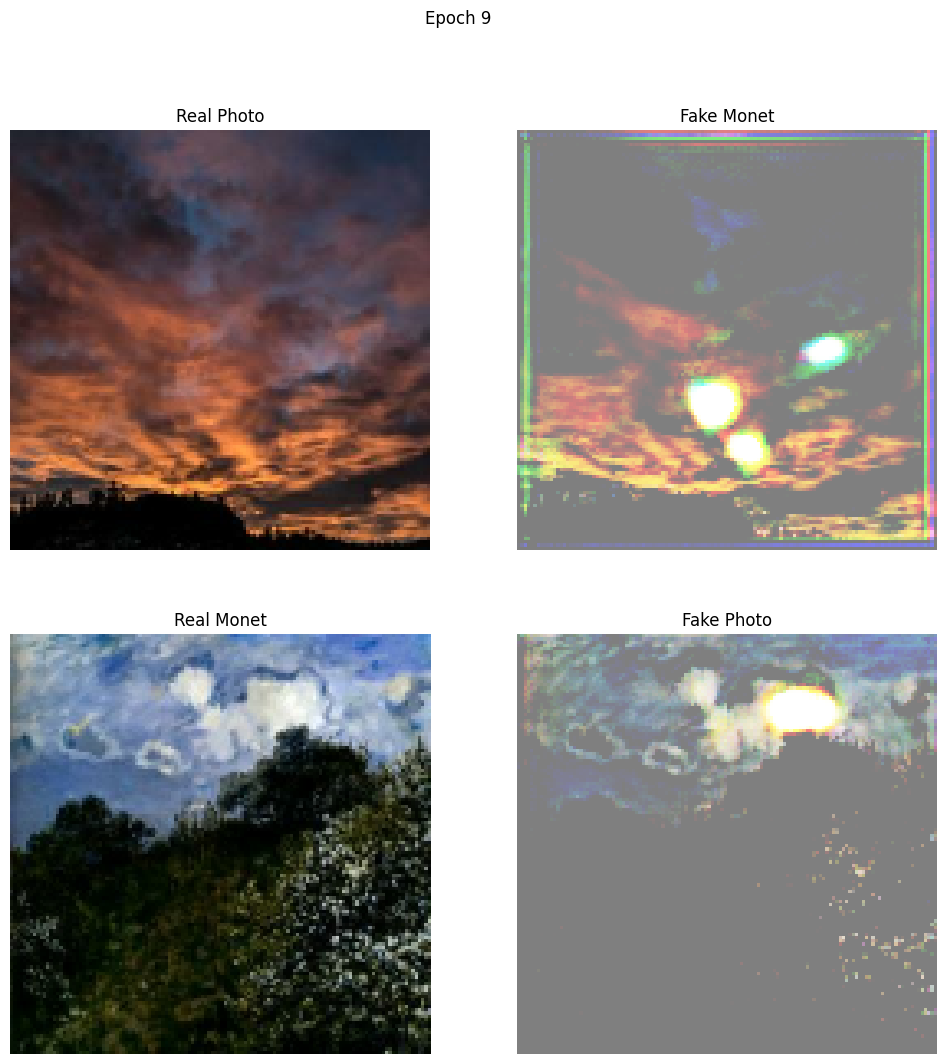

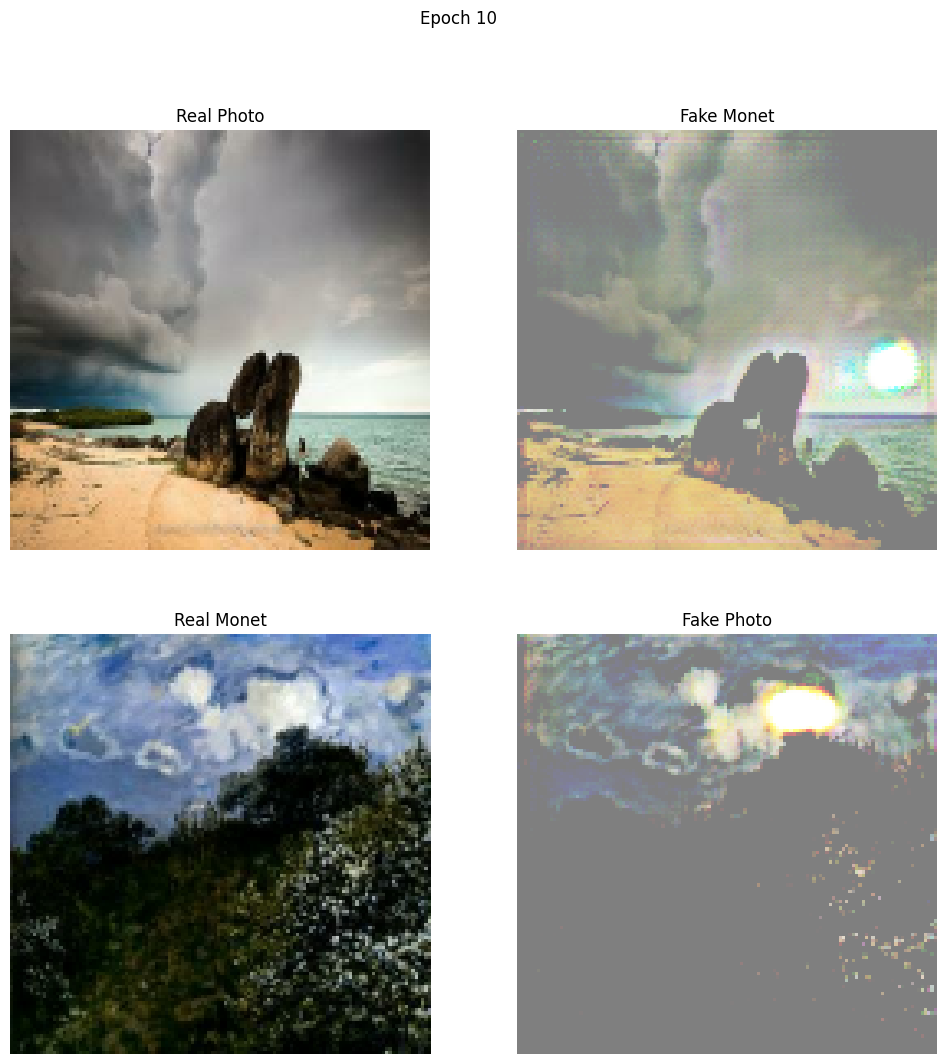

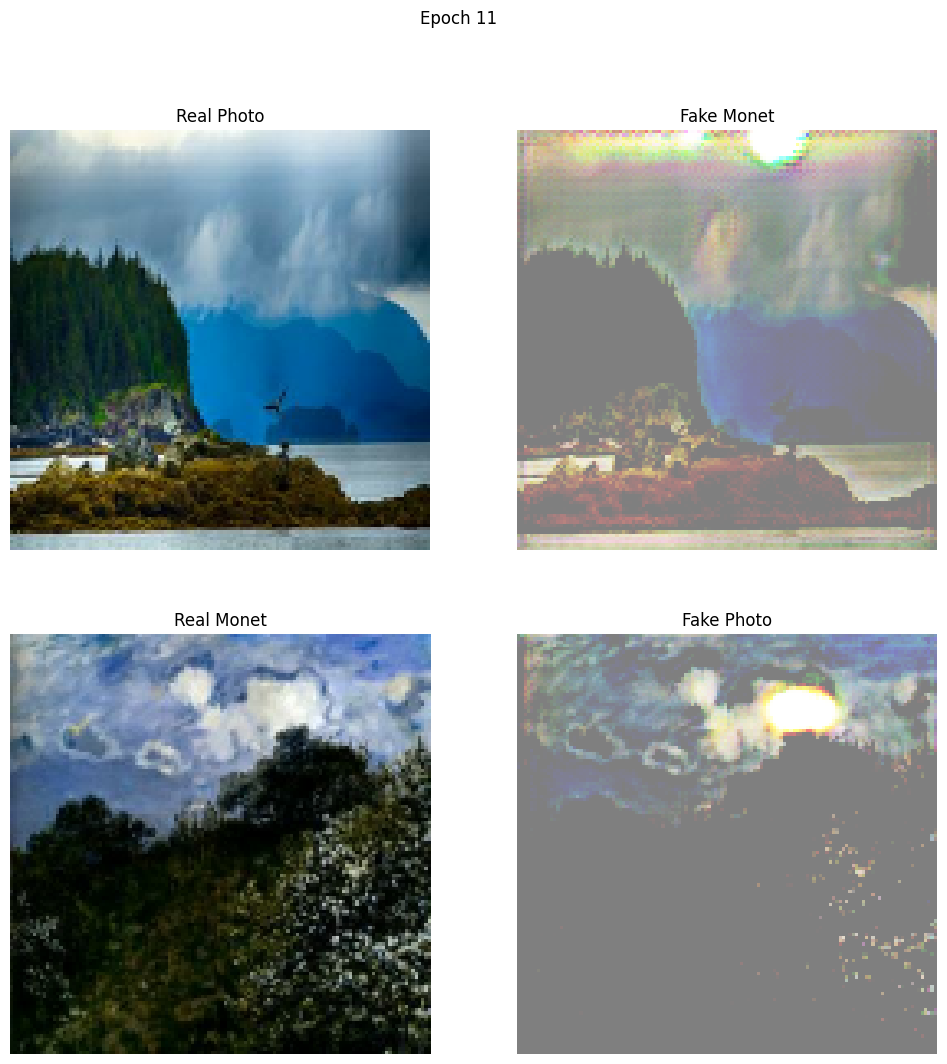

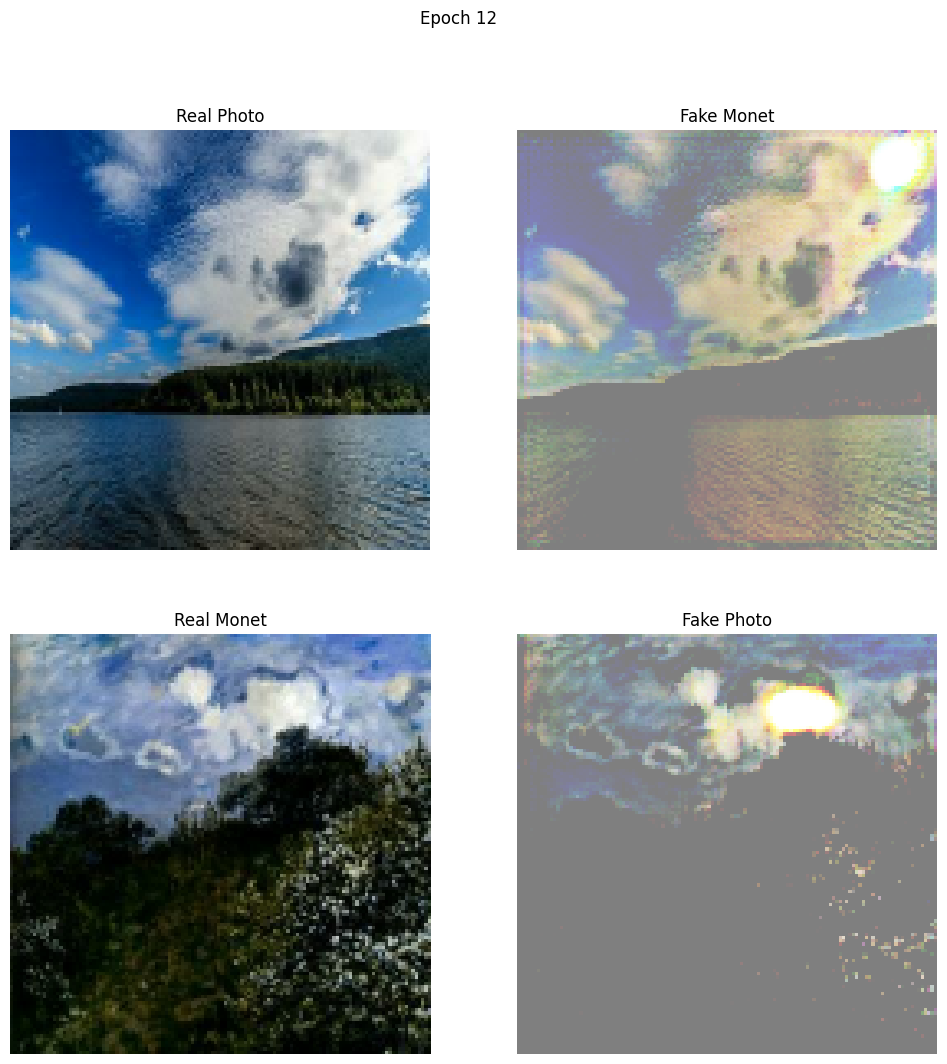

In [15]:
def generate_sample_images(real_x, real_y, epoch):
    fake_y = generator_g(real_x, training=False)
    fake_x = generator_f(real_y, training=False)
    
    fake_y = np.clip(fake_y, 0, 1)
    fake_x = np.clip(fake_x, 0, 1)

    plt.figure(figsize=(12, 12))
    images = [real_x[0], fake_y[0], real_y[0], fake_x[0]]
    titles = ['Real Photo', 'Fake Monet', 'Real Monet', 'Fake Photo']
    
    for i in range(4):
        plt.subplot(2, 2, i+1)
        img = (images[i] + 1) / 2.0
        img = np.clip(img, 0, 1)
        img = img.astype(np.float32)
        plt.imshow(img)
        plt.title(titles[i])
        plt.axis('off')
    plt.suptitle(f'Epoch {epoch}')
    plt.show()
    
for i in range(len(sample_x_list)):
    generate_sample_images(sample_x_list[i], sample_y_list[i], i + 1)

In [ ]:
output_folder = "/kaggle/working/images"
os.makedirs(output_folder, exist_ok=True)

num_images = 7000
counter = 0

def save_fake_monet_images(real_x, epoch):
    global counter
    if counter >= num_images:
        return 

    fake_y = generator_g(real_x, training=False)
    fake_y = np.clip(fake_y, 0, 1)
    for i in range(fake_y.shape[0]):
        if counter >= num_images:
            return
        img = (fake_y[i] + 1) / 2.0
        img = np.clip(img, 0, 1)
        img = (img * 255).astype(np.uint8)
        save_path = os.path.join(output_folder, f"monet_{counter}.jpg")
        Image.fromarray(img).save(save_path)
        counter += 1

for i in range(len(sample_x_list)):
    save_fake_monet_images(sample_x_list[i], i + 1)
    if counter >= num_images:
        break

print(f"{counter} Fake Monets saved to:'{output_folder}'.")

zip_path = output_folder
shutil.make_archive(zip_path, 'zip', output_folder)
print(f"{zip_path}.zip made")